| Name | Self-assessment factor | Contributions |
| --- | --- | --- |
| Anshul Grover | 1 | xxx |
| Rakesh Raj | 1 | **Task-1:**
|            |   |     [1] Added Callbacks such as EarlyStopping, ModelCheckpoint, 
|             |    |   [2] Added plots for train/valid loss, confusion matrix
|             |    |   [3] Performed Evaluation of the model on test data|
| Subhra Mohanty | 1 | **Task-2:**
|            |   |     [1] Standardized the data using feature scaling techniques, 
|             |    |   [2] Added plot for components vs variation
|             |    |   [3] Trained the model using kernels such as svm-linear, svm-polynomial, svm-rbf on 3000 training images|
| Mobarakka | 1 | xxx |
| Naveen Raja | 1 | xxx |

In [ ]:
#importing libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
#Downloading the CIFAR10 dataset
cifar10=tf.keras.datasets.cifar10

In [ ]:
#Downloading and Splitting the CIFAR10 dataset. 
(x_train, y_train), (x_test, y_test)=cifar10.load_data() 

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
#Defining Class in CIFAR10 dataset
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
#Display Images with display_images function.
import matplotlib.pyplot as plt
import os
plt.rc('image')
plt.rc('grid', linewidth=0)
plt.rc('text', color='a8151a')
plt.rc('figure', facecolor='F0F0F0')

def display_images(n,digits, predictions, labels, title):

  indexes = np.random.choice(len(predictions), size=n)
  n_digits = digits[indexes]
  n_predictions = predictions[indexes]
  n_predictions = n_predictions.reshape((n,))
  n_labels = labels[indexes]
 
  fig = plt.figure(figsize=(20, 4))
  plt.title(title)
  plt.yticks([])
  plt.xticks([])

  for i in range(n):
    ax = fig.add_subplot(1, n, i+1)
    class_index = n_predictions[i]
    
    plt.xlabel(classes[class_index])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(n_digits[i])


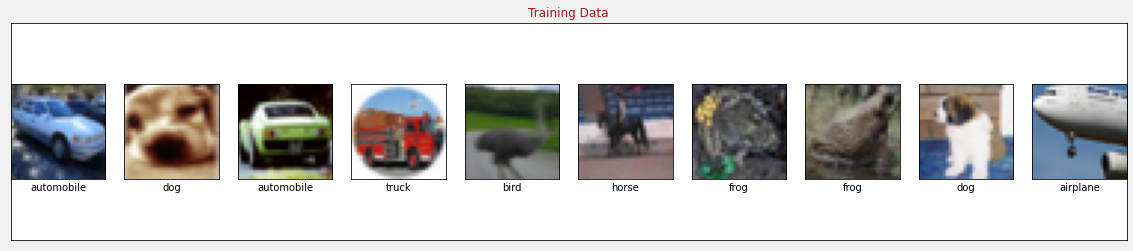

In [ ]:
display_images(10,x_train, y_train, y_train, "Training Data" )

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


# Splitting of the Data

In [ ]:
#Splitting the training data into training and validation data
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2)
print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3) (40000, 1) (10000, 1)


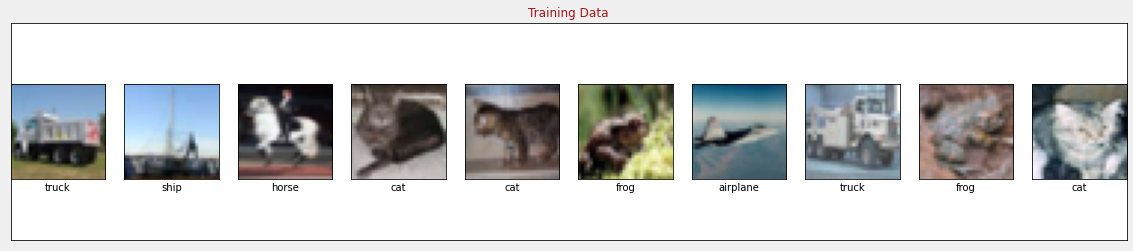

In [ ]:
display_images(10,x_valid, y_valid, y_valid, "Training Data" )

# Image Processing

In [ ]:
#Pre-Processing Image with preprocess_input in keras.applications
def preprocess_image(images):
  images = images.astype('float32')
  output_ims = tf.keras.applications.resnet50.preprocess_input(images)
  return output_ims

In [ ]:
x_t = preprocess_image(x_train)
x_v = preprocess_image(x_valid)

# Model Training
Defining the Resnet50 model and different layers, on which our model training will be performed.

In [ ]:
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, GlobalAveragePooling2D, Flatten
#Define Resnet50 model.
def net_model(inputs):

  net = ResNet50(input_shape=(224, 224, 3),
                          include_top=False,
                          weights='imagenet')(inputs)
  return net
#Define different Keras layers
def classifier(inputs):
    x = GlobalAveragePooling2D()(inputs)
    x = Flatten()(x)
    x = Dense(1024, activation="relu")(x)
    x = Dense(512, activation="relu")(x)
    x = Dense(10, activation="softmax", name="classification")(x)
    return x

def final_model(inputs):

    resize = tf.keras.layers.UpSampling2D(size=(7,7))(inputs)

    resnet_extractor = net_model(resize)
    classification = classifier(resnet_extractor)

    return classification

#Final Complie the Model
def compile_model():
  inputs = tf.keras.layers.Input(shape=(32,32,3))
  
  classification_output = final_model(inputs) 
  model = tf.keras.Model(inputs=inputs, outputs = classification_output)
 
  model.compile(optimizer='SGD', 
                loss='sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  
  return model


model = compile_model()

model.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 224, 224, 3)       0         
_________________________________________________________________
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
______________________________________________________________

In [ ]:
#Training the Model with different parameters, such as EPoch, Batch_size and Learning_rate.
EPOCHS = 5
history = model.fit(x_t, y_train, epochs=EPOCHS, validation_data = (x_v, y_valid), batch_size=32)

Epoch 1/5
1250/1250 [==============================] - 451s 332ms/step - loss: 0.3818 - accuracy: 0.8747 - val_loss: 0.1856 - val_accuracy: 0.9371
Epoch 2/5
1250/1250 [==============================] - 414s 332ms/step - loss: 0.1068 - accuracy: 0.9636 - val_loss: 0.1787 - val_accuracy: 0.9402
Epoch 3/5
1250/1250 [==============================] - 414s 331ms/step - loss: 0.0386 - accuracy: 0.9872 - val_loss: 0.1638 - val_accuracy: 0.9509
Epoch 4/5
1250/1250 [==============================] - 414s 332ms/step - loss: 0.0207 - accuracy: 0.9934 - val_loss: 0.1818 - val_accuracy: 0.9487
Epoch 5/5
1250/1250 [==============================] - 414s 331ms/step - loss: 0.0127 - accuracy: 0.9966 - val_loss: 0.1802 - val_accuracy: 0.9513


# Plotting Training and Validation Loss

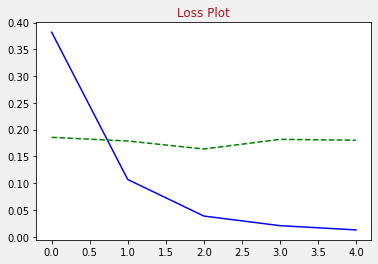

In [ ]:
plt.title('Loss Plot')
plt.plot(history.history['loss'],color='blue',label="Training_Loss")
plt.plot(history.history['val_loss'],color='green',linestyle='dashed',label='Validation_Loss')

# Evaluation of the Model on test data

In [ ]:
#Evaluate the Model on test data.
x_tes=preprocess_image(x_test)
acc=model.evaluate(x_tes,y_test,batch_size=32)
print("Loss of the Model is:",acc[0])
print("Accuracy of the Model is:",acc[1])

313/313 [==============================] - 29s 91ms/step - loss: 0.1803 - accuracy: 0.9515
Loss of the Model is: 0.18032009899616241
Accuracy of the Model is: 0.9514999985694885


# Testing of the Model

In [ ]:
#Testing the Model and check the predicted classes.
import numpy as np
probabilities = model.predict(x_tes, batch_size=64)
probabilities = np.argmax(probabilities, axis = 1)

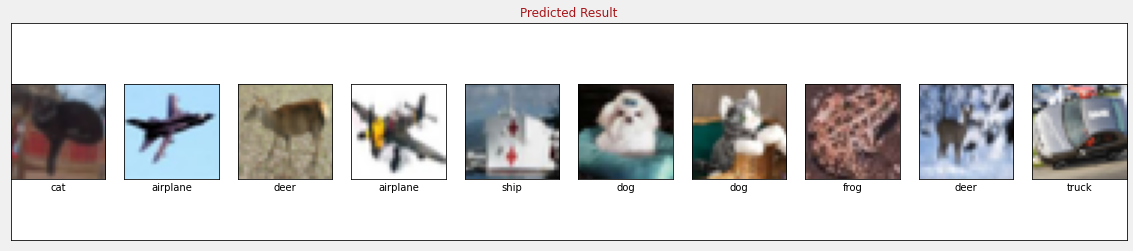

In [ ]:
display_images(10,x_test, probabilities, y_test, "Predicted Result")

# Plotting Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [ ]:
#Calculating Confusion_Matrix
cm=confusion_matrix(y_test, probabilities)

Text(0.5, 1.0, 'Confusion Matrix')

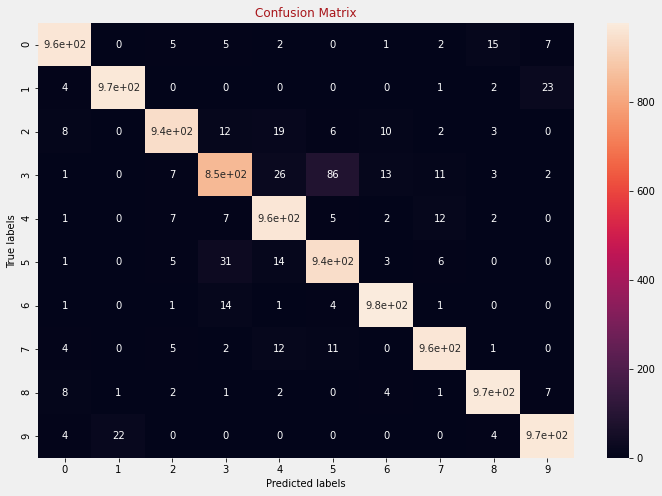

In [ ]:
#plotting Confusion Matrix.
ax=plt.subplots(figsize=(12,8))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels') 
plt.title('Confusion Matrix')